### Roll No: 2019102028 
### Name: Raj Singh Parihar

- all the resources and other files can be found [here](https://github.com/rajsinghparihar/CV_Assignments/tree/main/Assignment-0)

### Importing necessary libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

### Video to image capture using webcam
#### for primary webcam, videocapture src is 0.

In [14]:
vid = cv2.VideoCapture(0)
cnt = 201
i = 0
while(cnt > 0):
    ret, frame = vid.read()
    cv2.imwrite("./images/frame-{}".format(i) + '.jpg', frame)
    i += 1
    cnt -= 1

## Merging frames to get a video

### For Webcam frames

In [15]:
fps = int(24)
image = cv2.imread("./images/frame-0.jpg")
height, width, channels = image.shape

fourcc = cv2.VideoWriter_fourcc(*'mp4v') 
video = cv2.VideoWriter('./video.mp4', fourcc, fps, (width,height))

for j in range(0,200):
    image = cv2.imread(f"./images/frame-{j}.jpg")
    video.write(image)
video.release()

### For greenscreen video

In [20]:
greenscreen = cv2.VideoCapture("./videos/travolta.mp4")
i = 0
while(True):
    ret, frame = greenscreen.read()
    if ret == False:
        break
    frame = cv2.resize(frame, (640, 480))
    cv2.imwrite("./images/greenscreen-{}".format(i) + '.jpg', frame)
    i += 1

### For background video

In [21]:
bg = cv2.VideoCapture("./videos/dance.mp4")
i = 0
while(True):
    ret, frame = bg.read()
    if ret == False:
        break
    frame = cv2.resize(frame, (640, 480))
    cv2.imwrite("./images/bg-{}".format(i) + '.jpg', frame)
    i += 1

### Chroma Keying

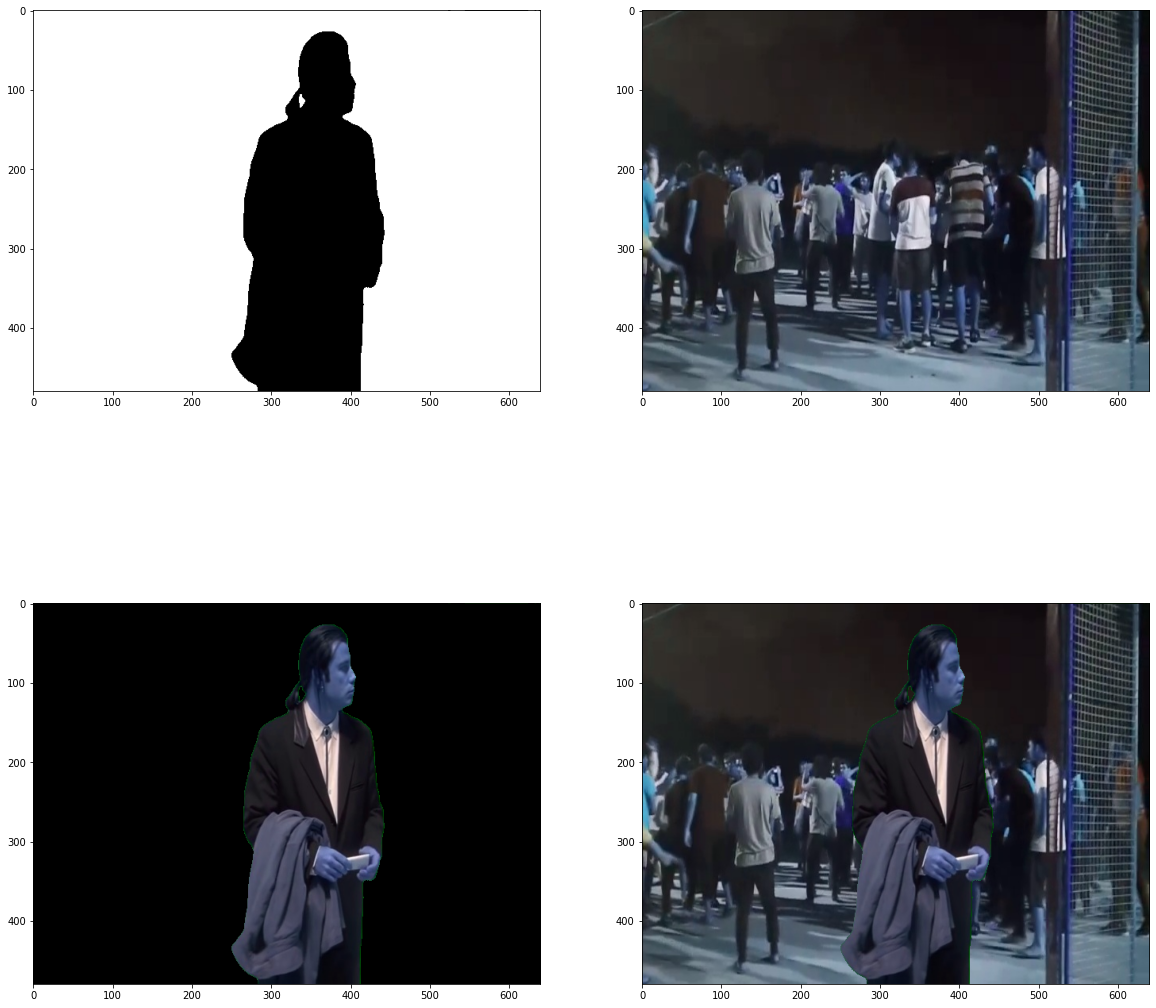

In [28]:
fps = int(24)
height = int(480)
width= int(640)

fourcc = cv2.VideoWriter_fourcc(*'mp4v') 
video = cv2.VideoWriter('./final_video.mp4', fourcc, fps, (width,height))

for j in range(99):

    gs = cv2.imread(f"./images/greenscreen-{j}.jpg")

    gs_copy = gs.copy()

    reds = gs_copy[:,:,0]
    greens = gs_copy[:,:,1]
    blues = gs_copy[:,:,2]
    
    mask = (greens > reds) & (greens > blues) & (greens > 100)

    masked_image = gs_copy
    masked_image[mask != 0] = [0, 0, 0]
    bg = cv2.imread(f"./images/bg-{j+160}.jpg")
    res = np.zeros_like(gs)
    for i in range(res.shape[0]):
        for k in range(res.shape[1]):
            if mask[i,k] == False:
                res[i,k,0]= gs_copy[i,k,0]
                res[i,k,1]= gs_copy[i,k,1]
                res[i,k,2]= gs_copy[i,k,2]
            elif mask[i,k] == True:
                res[i,k,0]= bg[i,k,0]
                res[i,k,1]= bg[i,k,1]
                res[i,k,2]= bg[i,k,2]

    video.write(res)
plt.figure(figsize=(20,20))
plt.subplot(221)
plt.imshow(mask,cmap="gray")
plt.subplot(222)
plt.imshow(bg)
plt.subplot(223)
plt.imshow(gs_copy)
plt.subplot(224)
plt.imshow(res)
video.release()